In [23]:
import pandas as pd

nodes_1d = pd.read_csv("urban-flood-modelling/1d_nodes_static.csv")
edges_1d = pd.read_csv("urban-flood-modelling/1d_edge_index.csv")


In [24]:
nodes_1d.head()

,node_idx,position_x,position_y,depth,invert_elevation,surface_elevation,base_area
0,0,802465.60,349898.84,8.977997,292.342,301.32,12.56
1,1,802528.94,349713.56,6.195984,295.164,301.36,12.56
2,2,802430.44,349608.60,5.480011,297.610,303.09,12.56
3,3,802420.06,349242.25,4.699982,310.450,315.15,12.56
4,4,802338.94,349292.66,3.593994,313.376,316.97,12.56


In [25]:
edges_1d.head()

,edge_idx,from_node,to_node
0,0,0,16
1,1,13,12
2,2,3,13
3,3,4,3
4,4,14,4


In [26]:
import networkx as nx

G_1d = nx.DiGraph()

# add nodes with positions
for idx, row in nodes_1d.iterrows():
    G_1d.add_node(
        idx,
        x=row["position_x"],
        y=row["position_y"]
    )

# add edges
for _, row in edges_1d.iterrows():
    G_1d.add_edge(row["from_node"], row["to_node"])


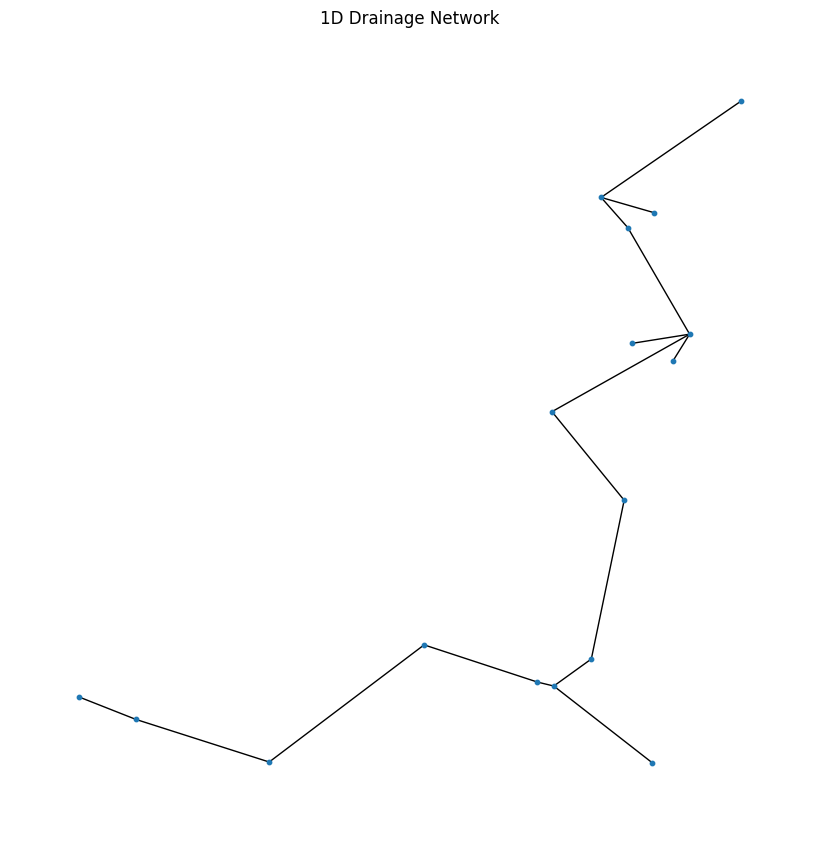

In [27]:
import matplotlib.pyplot as plt

pos = {
    n: (G_1d.nodes[n]["x"], G_1d.nodes[n]["y"])
    for n in G_1d.nodes
}

plt.figure(figsize=(8, 8))
nx.draw(
    G_1d,
    pos,
    node_size=10,
    arrows=False
)
plt.title("1D Drainage Network")
plt.show()


### Visualizing the 2D surface mesh

In [28]:
nodes_2d = pd.read_csv("urban-flood-modelling/2d_nodes_static.csv")
edges_2d = pd.read_csv("urban-flood-modelling/2d_edge_index.csv")

G_2d = nx.Graph()

for idx, row in nodes_2d.iterrows():
    G_2d.add_node(
        idx,
        x=row["position_x"],
        y=row["position_y"]
    )

for _, row in edges_2d.iterrows():
    G_2d.add_edge(row["from_node"], row["to_node"])


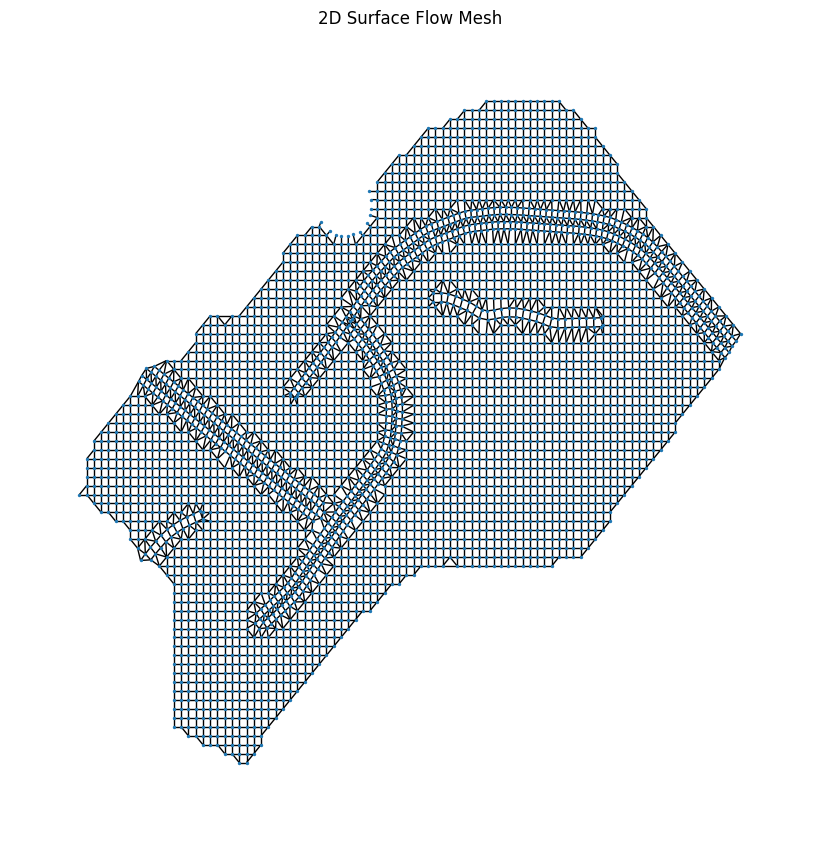

In [29]:
pos_2d = {
    n: (G_2d.nodes[n]["x"], G_2d.nodes[n]["y"])
    for n in G_2d.nodes
}

plt.figure(figsize=(8, 8))
nx.draw(G_2d, pos_2d, node_size=2)
plt.title("2D Surface Flow Mesh")
plt.show()


### Visualizing 1D–2D coupling

In [30]:
connections = pd.read_csv("urban-flood-modelling/1d2d_connections.csv")
connections.head()

,connection_idx,node_1d,node_2d
0,0,0,503
1,1,13,3669
2,2,12,3588
3,3,3,3595
4,4,4,3600


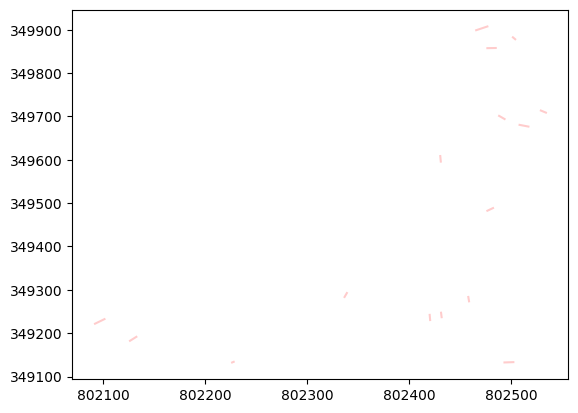

In [31]:
for _, row in connections.iterrows():
    x = [
        nodes_1d.loc[row["node_1d"], "position_x"],
        nodes_2d.loc[row["node_2d"], "position_x"]
    ]
    y = [
        nodes_1d.loc[row["node_1d"], "position_y"],
        nodes_2d.loc[row["node_2d"], "position_y"]
    ]
    plt.plot(x, y, color="red", alpha=0.2)


### Adding dynamics (water level coloring)

Example: color nodes by water level at timestep t=50.

In [32]:
dyn_1d = pd.read_csv("urban-flood-modelling/1d_nodes_dynamic_all.csv")
dyn_1d.head()

,timestep,node_idx,water_level,inlet_flow
0,0,0,294.87430,0.000000
1,0,1,288.22095,0.000000
2,0,2,311.72510,3.189905
3,0,3,310.67368,1.829733
4,0,4,311.72390,0.000000


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

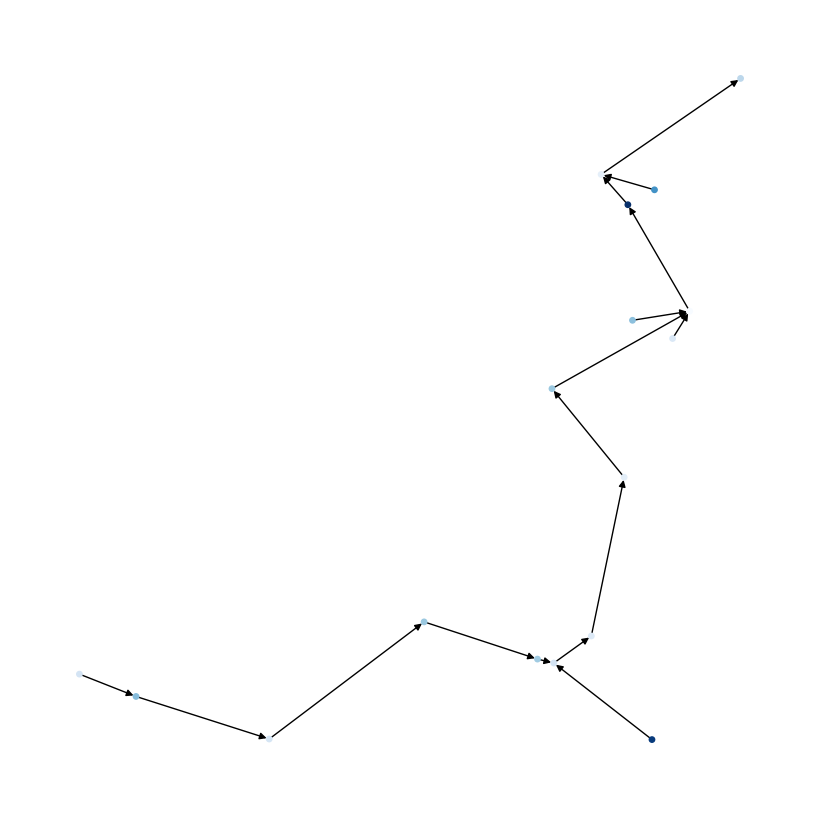

In [33]:
t = 50
slice_t = dyn_1d[dyn_1d["timestep"] == t]

water = slice_t["water_level"].values

plt.figure(figsize=(8,8))
nx.draw(
    G_1d,
    pos,
    node_color=water,
    cmap="Blues",
    node_size=15
)
plt.colorbar(label="Water Level (ft)")
plt.title(f"1D Water Levels at t={t}")
plt.show()


In [ ]:
plt.figure(figsize=(8,8))

# Draw nodes and capture the output
nodes = nx.draw_networkx_nodes(
    G_1d, 
    pos, 
    node_size=15, 
    node_color=water_levels,  # You need to pass the color data here
    cmap=plt.cm.viridis       # And specify a colormap
)

# Draw edges separately
nx.draw_networkx_edges(G_1d, pos)

# Now pass the 'nodes' object to colorbar
plt.colorbar(nodes, label="Water Level (ft)")
plt.title(f"1D Water Levels at t={t}")
plt.show()

NameError: name 'water_levels' is not defined

<Figure size 800x800 with 0 Axes>